In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.font_manager as fm

# 나눔글꼴 경로 설정
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'

# 폰트 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트 설정
plt.rc('font', family=font_name)

In [3]:
df = pd.read_csv('../01. Data/train.csv')
df

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,TRAIN_96289,14400000,36 months,10+ years,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C
96290,TRAIN_96290,28800000,60 months,10+ years,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E
96291,TRAIN_96291,14400000,36 months,1 year,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A
96292,TRAIN_96292,15600000,36 months,5 years,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D


In [4]:
df.drop(columns='ID', inplace=True)

In [5]:
df

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,36 months,10+ years,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C
96290,28800000,60 months,10+ years,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E
96291,14400000,36 months,1 year,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A
96292,15600000,36 months,5 years,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D


In [6]:
set(df['근로기간'])

{'1 year',
 '1 years',
 '10+ years',
 '10+years',
 '2 years',
 '3',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year',
 '<1 year',
 'Unknown'}

In [7]:
mapper = {'1 year' : 1,
          '1 years' : 1,
          '10+ years' : 10,
          '10+years' : 10,
          '2 years' : 2,
          '3' : 3,
          '3 years' : 3,
          '4 years' : 4,
          '5 years' : 5,
          '6 years' : 6,
          '7 years' : 7,
          '8 years' : 8,
          '9 years' : 9,
          '< 1 year' : 0,
          '<1 year' : 0,
          'Unknown' : np.nan}

In [8]:
df['근로기간'] = df['근로기간'].map(mapper)
df

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,12480000,36 months,6.0,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,14400000,60 months,10.0,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,12000000,36 months,5.0,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,14400000,36 months,8.0,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,18000000,60 months,NaN,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,36 months,10.0,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C
96290,28800000,60 months,10.0,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E
96291,14400000,36 months,1.0,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A
96292,15600000,36 months,5.0,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D


In [9]:
set(df['대출기간'])

{' 36 months', ' 60 months'}

In [10]:
df['대출기간'] = df['대출기간'].map({' 36 months':30, ' 60 months':60})

In [11]:
df

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,12480000,30,6.0,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,14400000,60,10.0,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,12000000,30,5.0,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,14400000,30,8.0,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,18000000,60,NaN,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,30,10.0,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C
96290,28800000,60,10.0,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E
96291,14400000,30,1.0,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A
96292,15600000,30,5.0,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D


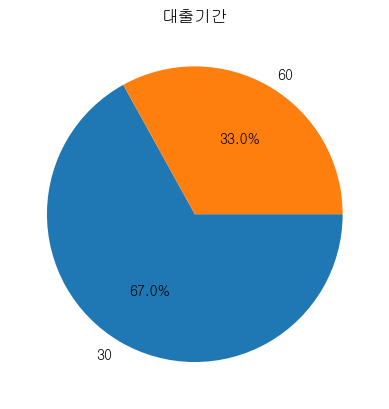

In [12]:
plt.pie(list(df['대출기간'].value_counts()), labels=list(df['대출기간'].value_counts().index),
        autopct='%.1f%%', counterclock=False)
plt.title('대출기간')
plt.show()

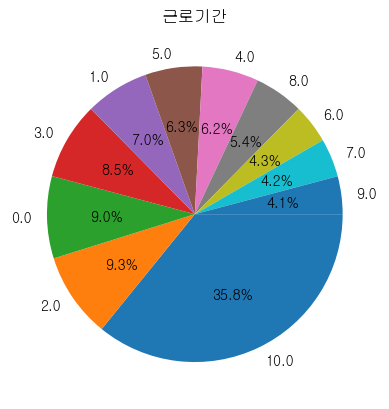

In [13]:
plt.pie(list(df['근로기간'].value_counts()), labels=list(df['근로기간'].value_counts().index),
        autopct='%.1f%%', counterclock=False)
plt.title('근로기간')
plt.show()

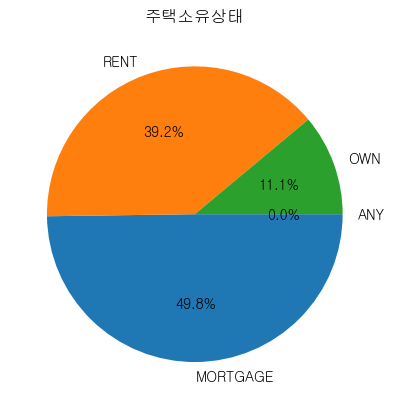

In [14]:
plt.pie(list(df['주택소유상태'].value_counts()), labels=list(df['주택소유상태'].value_counts().index),
        autopct='%.1f%%', counterclock=False)
plt.title('주택소유상태')
plt.show()

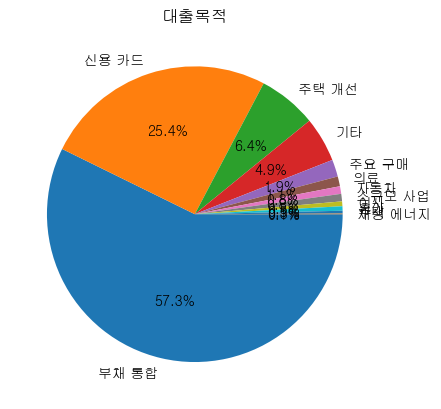

In [15]:
plt.pie(list(df['대출목적'].value_counts()), labels=list(df['대출목적'].value_counts().index),
        autopct='%.1f%%', counterclock=False)
plt.title('대출목적')
plt.show()

In [16]:
df['연간소득(만원)'] = df['연간소득'].apply(lambda x : x / 10000)
df

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,연간소득(만원)
0,12480000,30,6.0,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C,7200.0
1,14400000,60,10.0,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,13080.0
2,12000000,30,5.0,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A,9600.0
3,14400000,30,8.0,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C,13200.0
4,18000000,60,NaN,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B,7173.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,30,10.0,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C,21000.0
96290,28800000,60,10.0,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E,13200.0
96291,14400000,30,1.0,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A,8400.0
96292,15600000,30,5.0,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D,6633.0


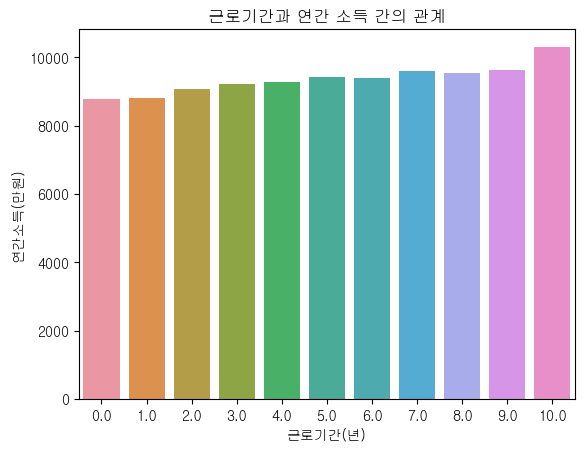

In [17]:
sns.barplot(data=df[~df['근로기간'].isna()], x='근로기간', y='연간소득(만원)', ci=None)
plt.xlabel('근로기간(년)')
plt.title('근로기간과 연간 소득 간의 관계')
plt.show()

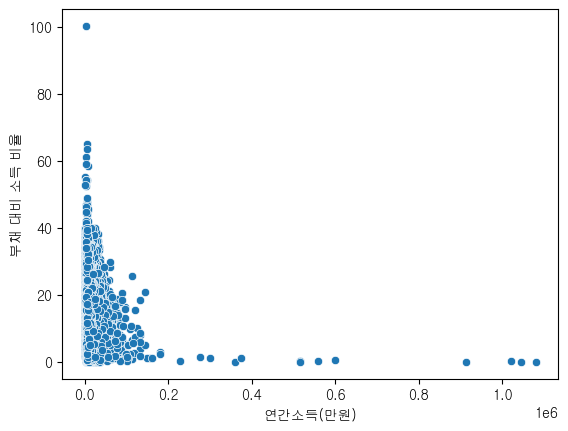

In [18]:
sns.scatterplot(data=df[~df['근로기간'].isna()], 
            x='연간소득(만원)', 
            y='부채_대비_소득_비율')
plt.xlabel('연간소득(만원)')
plt.ylabel('부채 대비 소득 비율')
#plt.title('근로기간과 연간 소득 간의 관계')
plt.show()

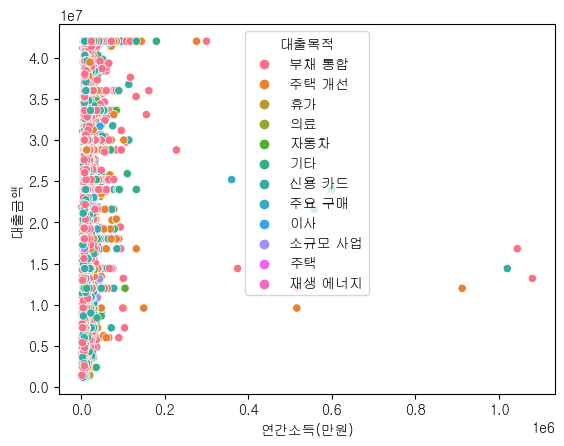

In [19]:
sns.scatterplot(data=df[~df['근로기간'].isna()], 
            x='연간소득(만원)', 
            y='대출금액', hue='대출목적')
plt.xlabel('연간소득(만원)')
#plt.title('근로기간과 연간 소득 간의 관계')
plt.show()

In [20]:
len(df['근로기간'].unique())

12

In [21]:
df

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,연간소득(만원)
0,12480000,30,6.0,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C,7200.0
1,14400000,60,10.0,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,13080.0
2,12000000,30,5.0,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A,9600.0
3,14400000,30,8.0,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C,13200.0
4,18000000,60,NaN,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B,7173.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,30,10.0,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C,21000.0
96290,28800000,60,10.0,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E,13200.0
96291,14400000,30,1.0,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A,8400.0
96292,15600000,30,5.0,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D,6633.0


In [35]:
df.mean(numeric_only=True)

대출금액            1.830400e+07
대출기간            3.991183e+01
근로기간            6.007791e+00
연간소득            9.392672e+07
부채_대비_소득_비율     1.937959e+01
총계좌수            2.530483e+01
최근_2년간_연체_횟수    3.456809e-01
총상환원금           8.225035e+05
총상환이자           4.282282e+05
총연체금액           5.438058e+01
연체계좌수           5.805138e-03
연간소득(만원)        9.392672e+03
dtype: float64

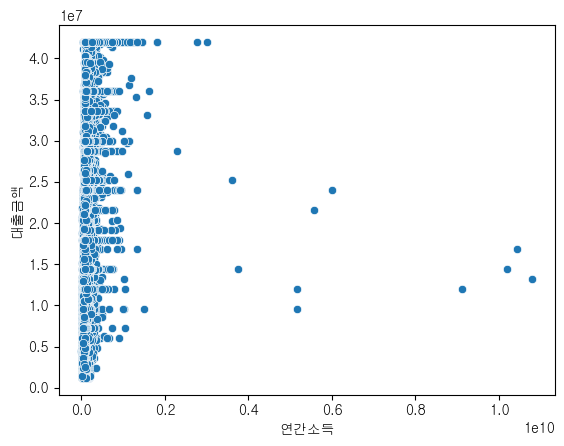

In [38]:
sns.scatterplot(data=df, x='연간소득', y='대출금액', palette='muted')
plt.show()

In [49]:
df['연간소득(log)'] = df['연간소득'].apply(lambda x : np.log(x))
df

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,연간소득(만원),연간소득(log)
0,12480000,30,6.0,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C,7200.0,18.092177
1,14400000,60,10.0,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,13080.0,18.689180
2,12000000,30,5.0,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A,9600.0,18.379859
3,14400000,30,8.0,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C,13200.0,18.698312
4,18000000,60,NaN,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B,7173.6,18.088503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,14400000,30,10.0,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C,21000.0,19.162618
96290,28800000,60,10.0,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E,13200.0,18.698312
96291,14400000,30,1.0,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A,8400.0,18.246327
96292,15600000,30,5.0,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D,6633.0,18.010153


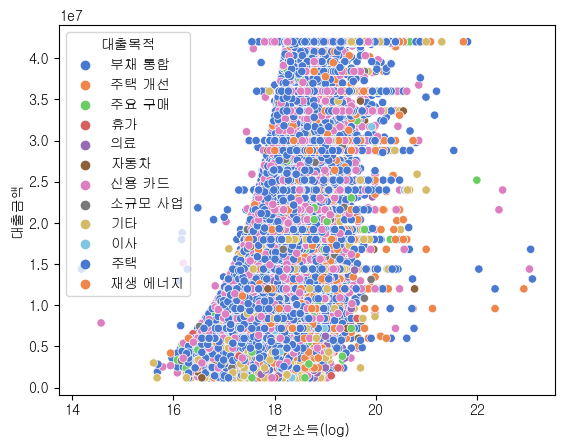

In [51]:
sns.scatterplot(data=df, x='연간소득(log)', y='대출금액', palette='muted', hue='대출목적')
plt.show()

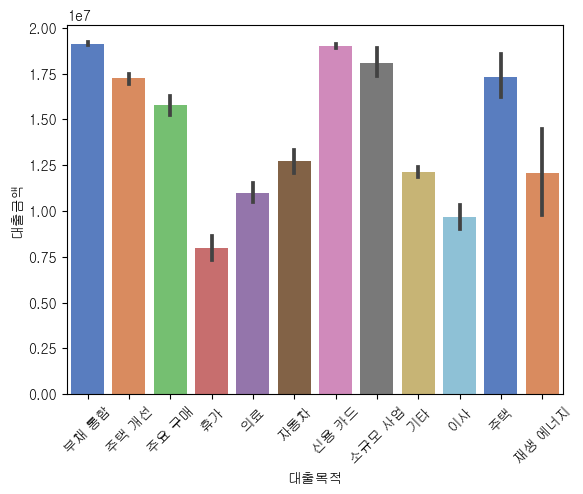

In [53]:
sns.barplot(df, x='대출목적', y='대출금액', palette='muted')
plt.xticks(rotation=45)
plt.show()

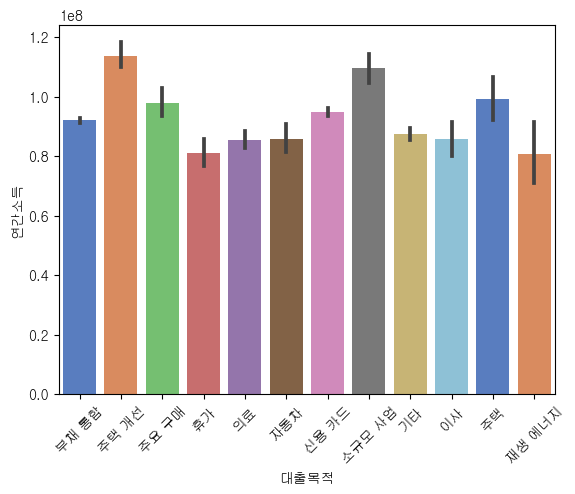

In [56]:
sns.barplot(df, x='대출목적', y='연간소득', palette='muted')
plt.xticks(rotation=45)
plt.show()

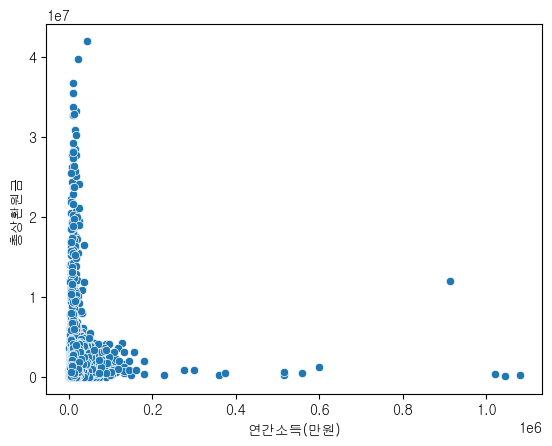

In [64]:
sns.scatterplot(df, x='연간소득(만원)', y='총상환원금', palette='muted')
plt.show()